<a href="https://colab.research.google.com/github/manikbali/gsics/blob/main/Process_GSICS_GOES_16_17_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GSICS GOES-16/17 Product User Platform [ Re-Analysis Correction (RAC) ]
*By Manik Bali, ESSIC/UMD*

We present here a python platform built on Google Colab, aimed to help users use GSICS products. This has python codes that can help you

1. Pick a GSICS product directly from  [GSICS Product Catalog](https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php)
2. Extract variables from GSICS products
3. Plot extracted Variables
4. Apply the correction coefficients to correct biases in monitored instrument and plot them
5. Instantly share your code and data with the GSICS community, its users and friends ( ISCCP, GEO, GCOS, WMO members )

**Features of GSICS User Google Colab Platform**:

Google Colab is a collaborative development environment. Its a Paradigm shift in the manner in which GSICS data and code are being shared. Here we are sharing data with a working instance of the algorithm and a python code.
Members accessing this colab can contribute their modules to the Colab notebook as well as pick up code from here (under the GSICS GPL)

Currently accessible by most of the GSICS member agencies. It gives a python run time environment directly in your browser. The platform is shareable, comes free and has cloud computing resources inbuilt into it.
GSICS members can make contributions of code directly into the colab library.

**How to plot variables in a GSICS products**

The first part of the code reads in GSICS data( NetCDF) that resides on the GSICS product Catalog and plots the bias on the Stadard Scene.
One can plot any variable extracted from the GSICS Product. Here we plot the Standard Scente Temp bias time series.

**How to use Correction Coefficients to correct biases**

The second part of the code uses the GSICS Correction coefficients that can be used to correct the operationally produced radiance in the GEO
Meteosat/SEVIRI L1.5 data, LGEO, so its calibration is consistent with that of the LEO reference instrument, Metop/IASI, LLEO.

The steps uses are the following

The operational radiance, LGEO, is calculated from the L1.5 counts as:

Equation 1:


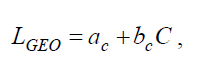


where C is the pixel count, ac and bc are the operational offset and slope calibration
coefficients, respectively, referred to as Cal_Offset and Cal_Slope in the L1.5 files [AD-3].

The GSICS Corrected radiance is then given by Equation 2, which may be re-written as


Equation 2 [ Corrected Radiance can be written as]:

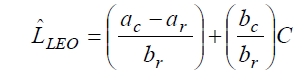

where ar  and br  are the coefficients of the GSICS Correction given in the netCDF file as the
variables offset and slope, respectively.

This is equivalent to  changing the space count  and calibration coefficient in Equation 4 to
ag=(ac- ar)/br and bg= (bc/br), respectively.


Modus Operandi
The code reads in the correction coefficients and applies these on a synthetic GEO measurement to get an estimate of the impact of using GSICS Correction Coefficients


**References**

EUMETSAT GSICS Product User Guide [link](https://www.eumetsat.int/website/wcm/idc/idcplg?IdcService=GET_FILE&dDocName=PDF_DMT_803180&RevisionSelectionMethod=LatestReleased&Rendition=Web)

**How to use this Notebook for the product you are interested in**

This notebook is for Product Type Near Real Time Correction. For Product Type Re-Analysis Correction click [here](https://colab.research.google.com/drive/1ENBFgZ1IOgXNw6bS-0X14AshT729yIf2)

1. Make a copy of this notebook Click File-> Save a Copy in Drive
2. On the GSICS Product Catalog https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php select the data set you are interested. Under the url give the link to the catalog.html path. See image below
3. Under Runtime press Run All

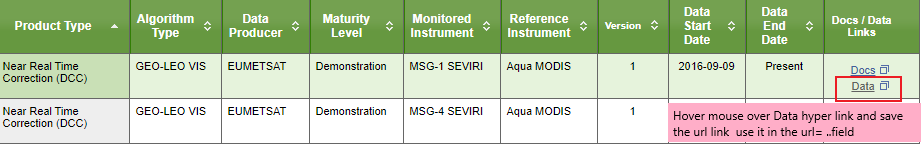


In [ ]:
#url='https://www.star.nesdis.noaa.gov/thredds/catalog/rac-glr-goes17-imager-metopb-iasi-preop/catalog.html'
#url='https://www.star.nesdis.noaa.gov/thredds/catalog/rac-glr-goes17-imager-metopb-iasi-preop/catalog.html'
url='https://www.star.nesdis.noaa.gov/thredds/catalog/rac-glr-goes16-imager-metopb-iasi-preop/catalog.html'
#url="https://www.star.nesdis.noaa.gov/thredds/catalog/rac-glr-goes16-imager-npp-cris-preop/catalog.html" # Url obtained by hovering the mouse over the Data hyperlink of the NRT product you are interested in and then Press Runtime->Run All

**Install required modules and Import default Modules**

In [ ]:
!pip install netCDF4
!pip install julian
!pip install cftime
!pip install nco

import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import datetime
import urllib.request
from datetime import date
import julian
import matplotlib
from cftime import num2pydate
from netCDF4 import num2date
import pandas as pd
from datetime import datetime
import urllib.request

import requests
from bs4 import BeautifulSoup
import xarray


In [ ]:
import nco


**Read the NRT Data Files from the THREDDS server and concatenate them**

In [ ]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

#datasets = [xray.open_dataset(url) for url in urls]
#merged = xray.concat(datasets, 'forecast_time')
#merged.to_netcdf('all-data.nc')

#url = "http://gsics.eumetsat.int/thredds/catalog/msg1-seviri-aqua-modis-demo-nrtc/catalog.html"
#url="http://gsics.eumetsat.int/thredds/catalog/metopa-hirs-metopa-iasi-demo-nrtc/catalog.html" //Covariance is not present in all datasets
basen=url.split('/')
basen.insert(basen.index('thredds')+1,'fileServer')
basen.remove("catalog")
s='/'
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')
urllist=[]
filelist=[]
nrtfiles=[]
for a in soup.find_all('a', href=True):
    hhref = a['href'].split('/')
    if(np.size(hhref) ==2):
        fname=a.text
        basen[-1] = a.text
        print(s.join(basen))
        fileurl=s.join(basen)
        urllist.append(fileurl)
        filelist.append(a.text)
        urllib.request.urlretrieve(fileurl, fname)
#        len(nc4.Dataset(fname,'r').variables['covariance'].get_dims() )
#        print(nc4.Dataset(fname,'r').variables['covariance'].ndim)
        nrtfiles.append(xarray.open_dataset(fname))
#        nrtfiles.append(xarray.open_dataset(fname).to_netcdf( format='NETCDF3_CLASSIC'))
#        dataset=xarray.open_dataset (fileurl)


https://www.star.nesdis.noaa.gov/thredds/fileServer/rac-glr-goes16-imager-metopb-iasi-preop/W_US-NESDIS-STAR,SATCAL+RAC_GEOLEOIR,GOES16+ABI-MetopB+IASI_C_KNES_20210101000000_preOp_01.nc
https://www.star.nesdis.noaa.gov/thredds/fileServer/rac-glr-goes16-imager-metopb-iasi-preop/W_US-NESDIS-STAR,SATCAL+RAC_GEOLEOIR,GOES16+ABI-MetopB+IASI_C_KNES_20201201000000_preOp_01.nc
https://www.star.nesdis.noaa.gov/thredds/fileServer/rac-glr-goes16-imager-metopb-iasi-preop/W_US-NESDIS-STAR,SATCAL+RAC_GEOLEOIR,GOES16+ABI-MetopB+IASI_C_KNES_20201101000000_preOp_01.nc
https://www.star.nesdis.noaa.gov/thredds/fileServer/rac-glr-goes16-imager-metopb-iasi-preop/W_US-NESDIS-STAR,SATCAL+RAC_GEOLEOIR,GOES16+ABI-MetopB+IASI_C_KNES_20200201000000_preOp_01.nc


In [ ]:
print(nrtfiles[0].variables )

Frozen({'wnc': <xarray.Variable (chan: 10)>
array([2565.8132 , 1615.3523 , 1442.1691 , 1362.955  , 1184.1606 , 1040.3878 ,
        968.1667 ,  892.0766 ,  813.87494,  753.2843 ], dtype=float32)
Attributes:
    units:      cm^-1
    long_name:  monitored instrument channel central wavenumber, 'bc1': <xarray.Variable (chan: 10)>
array([0.314473, 1.374342, 0.290283, 0.043539, 0.196626, 0.056323, 0.102289,
       0.039242, 0.076796, 0.003651], dtype=float32)
Attributes:
    units:      K
    long_name:  radiance to brightness temperature conversion band correction..., 'bc2': <xarray.Variable (chan: 10)>
array([0.998488, 0.995295, 0.998791, 0.999797, 0.999417, 0.99962 , 0.999712,
       0.999119, 0.99915 , 0.999776], dtype=float32)
Attributes:
    units:      1
    long_name:  radiance to brightness temperature conversion band correction..., 'fk1': <xarray.Variable (chan: 10)>
array([201186.92  ,  50203.832 ,  35725.2   ,  30155.986 ,  19776.805 ,
        13412.713 ,  10808.861 ,   8455.416

In [ ]:
nrtfiles

[<xarray.Dataset>
 Dimensions:                   (Dim2_1: 2, Dim2_2: 2, chan: 10, date: 31, smooth_window: 29, validity: 2)
 Coordinates:
   * date                      (date) datetime64[ns] 2021-01-01T12:00:00 ... 2...
 Dimensions without coordinates: Dim2_1, Dim2_2, chan, smooth_window, validity
 Data variables: (12/26)
     wnc                       (chan) float32 2.566e+03 1.615e+03 ... 813.9 753.3
     bc1                       (chan) float32 0.3145 1.374 ... 0.0768 0.003651
     bc2                       (chan) float32 0.9985 0.9953 ... 0.9991 0.9998
     fk1                       (chan) float32 2.012e+05 5.02e+04 ... 5.091e+03
     fk2                       (chan) float32 3.692e+03 2.324e+03 ... 1.084e+03
     channel_name              (chan) |S11 b' 3.9um' b' 6.2um' ... b'13.3um'
     ...                        ...
     wrm_scene_tb_bias         (date, chan) float32 -0.008087 -0.1939 ... -0.3499
     wrm_scene_tb_bias_se      (date, chan) float32 0.01357 0.04313 ... 0.01702
   

In [ ]:

#cov=nrtfiles[1].variables['covariance'][:][:][:][:]
#img = plt.plot(cov[:][1][0][:])
#plt.title("Covariance")


In [ ]:
#Concatenate NetCDF files into one object ( ncid)
ncid = xarray.concat( nrtfiles, dim='date')
#ncid=nrtfiles[1]
#dsmerged = xarray.merge([nrtfiles])
#ncid=xarray.merge( nrtfiles)

#from google.colab import drive
#drive.mount('/content/gdrive')

**Read variables. List of variables and attributes in this product can be found in the section above**

In [ ]:
std_bias      = ncid.variables['std_scene_tb_bias'][:][:] # Standard Scene TB Bias
time_array    = ncid.variables['date'][:] #time
freq_array    = ncid.variables['wnc'][:] #wnc
std_scene_tb    = ncid.variables['std_scene_tb'][:] # Scene TB
#delta_slope    = ncid.variables['delta_slope'][:] # Slope
#delta_offset    = ncid.variables['delta_offset'][:] # Offset
#reference_name    = ncid.variables['reference_name'][:] # Refname
alpha             = ncid.variables['fk1'][:] # Alpha
beta              = ncid.variables['fk2'][:] # Beta
br0              = ncid.variables['slope'][:] # Slope
ar0              = ncid.variables['offset'][:] # Offset
mon_inst   = ncid.monitored_instrument
ref_inst   = ncid.reference_instrument
#     time_array =time_array/86400.0

In [ ]:
print(std_bias.shape)

(120, 10)


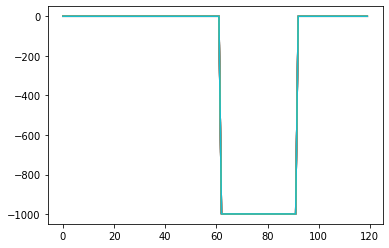

In [ ]:
plt.plot(std_bias)

**Plot the Standard Scene Bias Time Series**

(120, 11)
2020-02-01T12:00:00.000000000 2021-01-31T12:00:00.000000000
(366,)


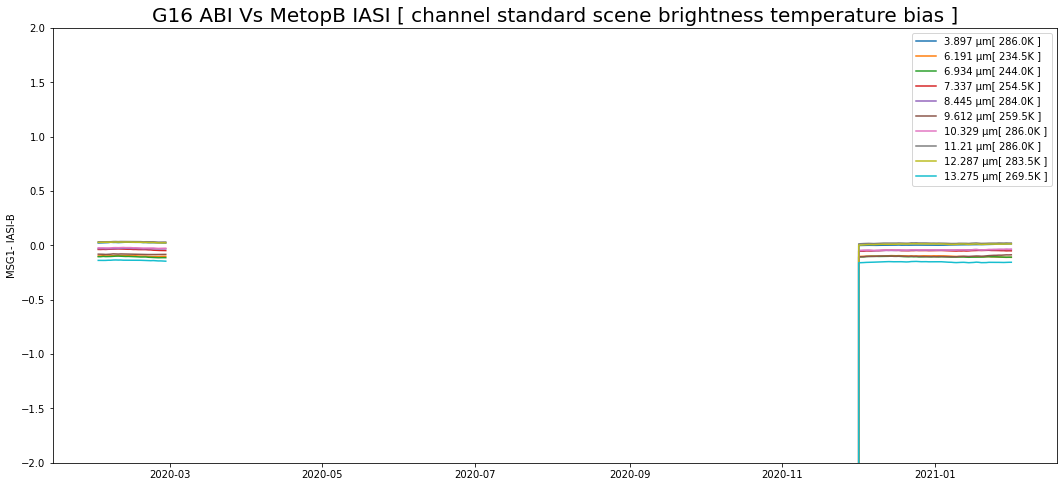

In [ ]:
plt.figure(figsize=(18,8))
plt.ylim(-2, 2)
time_array    = ncid.variables['date'][:] #time
ttitle= mon_inst +" Vs "+ ref_inst+" [ "+std_bias.attrs['long_name']+" ]"
#plt.plot(time_array,std_bias)
plt.title(ttitle,fontsize=20)

#Get the dates
dtime_days=pd.DataFrame(np.array(time_array) ,columns=list('t'))
#Convert the variable into Data Frame
std_df = pd.DataFrame( np.array(std_bias))
ar_df=pd.DataFrame(np.array(ar0))
ar_df.columns.name = 'offset'

br_df=pd.DataFrame(np.array(br0))
br_df.columns.name = 'bias'
std_df.columns.name = 'standard_scene_bias'


#Add time axis to the Variabes
df_time_bias =  pd.concat([dtime_days,std_df] ,axis=1)
df_time_ar =  pd.concat([dtime_days,ar_df] ,axis=1)
df_time_br =  pd.concat([dtime_days,br_df] ,axis=1)

#Drop ( Remove) Duplicate dates if any
temp=df_time_bias.drop_duplicates(subset=['t'])
temp_ar =df_time_ar.drop_duplicates(subset=['t'])
temp_br =df_time_br.drop_duplicates(subset=['t'])

print(temp.shape)
#Insert NaN on missing days and make time series continous daily. So reindex time array
new_index= pd.Index(pd.date_range(start= np.min(np.array(ncid.date)[:]) ,end= np.max(np.array(ncid.date)[:])) ,name="t")
df_reindex=temp.set_index("t").reindex(new_index)
df_reindex_ar=temp_ar.set_index("t").reindex(new_index)
df_reindex_br=temp_br.set_index("t").reindex(new_index)
print( np.min(np.array(ncid.date)[:]),np.max(np.array(ncid.date)[:]) )
#print( np.array(ncid.date)[0] )
#Convert the Data Frame to numpy. This removes the date axis and readies it to be plotted by matplot lib
#Options such as plotting in Data Frame , plotly could be explored
df_array=df_reindex.to_numpy()
df_array_ar = df_reindex_ar.to_numpy()
df_array_br = df_reindex_br.to_numpy()

#Plot the time series
plt.plot(new_index,df_array)
#df_reindex.plot(ylim=(-2,2) )

#Set Y Axis title
plt.ylabel('MSG1- IASI-B')
#Ar BR CR
ar=df_array_ar.copy()
br=df_array_br.copy()
cr=df_array_ar/df_array_br

#Set Legend
cf=10000/np.array(freq_array[0])
cf=np.around(cf,decimals=3)
cfreq = [[str(freq)] + [u"\u03bcm"] for freq in cf  ]
cfreq = [ ' '.join(freq) for freq in cfreq ]

std_scene_tb=np.array(std_scene_tb)
cfreq=[ ''.join(cfreq[fr] +"[ " + str(std_scene_tb[0][fr])+ "K ]") for fr in range(len(cfreq))]
plt.legend(cfreq)
print(new_index.shape)

**Extract Correction Coefficients [ ar,br,cr] from the data File and reindex them to daily time series from start to end dates**

In [ ]:
print(df_reindex.head(),br)

                            0         1         2  ...         7         8         9
t                                                  ...                              
2020-02-01 12:00:00  0.021912 -0.097351 -0.104187  ...  0.032867  0.027130 -0.138123
2020-02-02 12:00:00  0.022583 -0.097198 -0.104294  ...  0.032867  0.027893 -0.138824
2020-02-03 12:00:00  0.023834 -0.095001 -0.101669  ...  0.033325  0.028778 -0.138519
2020-02-04 12:00:00  0.024780 -0.097534 -0.103470  ...  0.032654  0.028534 -0.138336
2020-02-05 12:00:00  0.025330 -0.097198 -0.103088  ...  0.033142  0.029175 -0.136810

[5 rows x 10 columns] [[0.9988494  0.9944068  0.99494433 ... 0.99540347 0.99820477 0.99126214]
 [0.9987988  0.9942577  0.99483824 ... 0.99551857 0.9982896  0.99138767]
 [0.9987883  0.9941221  0.9946897  ... 0.9955004  0.9982272  0.99143225]
 ...
 [0.99862725 0.9950025  0.99552405 ... 0.99553305 0.9985452  0.99141836]
 [0.99864227 0.99501944 0.9955817  ... 0.99564296 0.9987687  0.99170876]
 [0.99854535

**Prepare Arrays for storing Variables and Plot ar, br time series**

---



(366,)
3660 10
(120, 10)


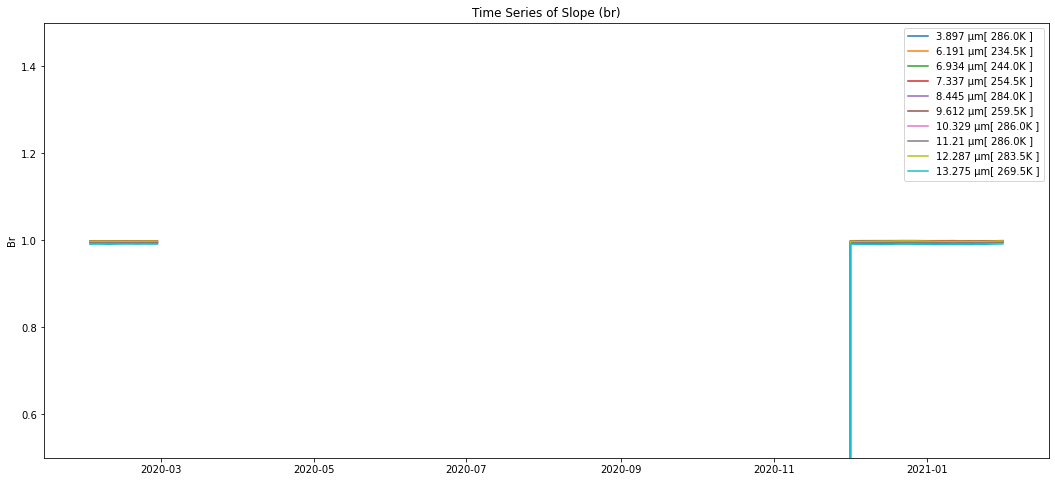

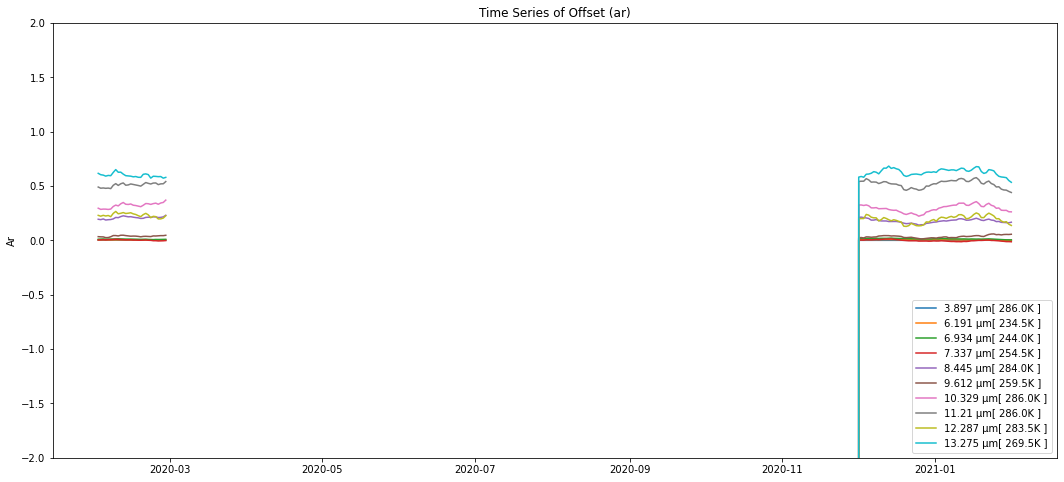

In [ ]:
import math
c1 = 1.19104e-05
c2 = 1.43877
nchans=len(np.array(freq_array[:][0]))
wnc=np.array(freq_array[:][0].copy())
N=(c1 * wnc*wnc*wnc)
#Calculate Standard Scene Radiance from Standard Scene Temperature
std_scene_rad=(c1 * wnc*wnc*wnc) / ((np.exp(c2 * wnc/(np.array(alpha)[:][0] * std_scene_tb[:][0] + np.array(beta)[:][0]))) - 1.) # BT to Radiance
#print (nchans,len(days_since1970) )
print(new_index.shape)

#Declare and initialize arrays. These would be used to store corrected radiances.
days_since1970 = np.zeros(len(new_index))

rad_bias_array=np.zeros((nchans,len(days_since1970)),dtype='f')
ref_bt=np.zeros((nchans,len(days_since1970)),dtype='f')
print(ref_bt.size, nchans)
ref_rad=np.zeros((nchans,len(days_since1970)),dtype='f')
gsics_corr_rad=np.zeros((nchans,len(days_since1970)),dtype='f')
radiance=np.zeros((nchans),dtype='f')
gsics_corr_bt=np.zeros((nchans,len(days_since1970)),dtype='f')
bt_bias_array=np.zeros((nchans,len(days_since1970)),dtype='f')

plt.figure(figsize=(18,8))
plt.plot(new_index,df_array_br)
plt.ylim(0.5,1.5)
plt.ylabel('Br')
plt.legend(cfreq)
plt.title("Time Series of Slope (br)")
plt.figure(figsize=(18,8))
plt.plot(new_index,df_array_ar)
plt.title("Time Series of Offset (ar)")
plt.ylim(-2,2)
plt.ylabel('Ar')
plt.legend(cfreq)
print(std_scene_tb.shape)

**Apply correction on Standard Scence Bias**

In [ ]:
print(std_scene_tb.shape)
#print(n,nchans, len(days_since1970),len(std_scene_tb), df_array.shape,ref_bt.shape )
print(std_scene_tb[:][0])
print(df_array[0,:].shape)
for n in range(len(days_since1970)-2):
#  print(n,nchans, len(days_since1970),len(std_scene_tb), df_array.shape,ref_bt.shape )
  ref_bt[:,n]= std_scene_tb[:][0]  - df_array[n,: ]
#  t=std_scene_tb[:][0] - df_array[n,:]
  tempp=ref_bt[:,n].copy()
  #Convert Temp into Radiance. Constants in the Formula taken from Data File
  ref_rad[:,n]= (c1 * wnc*wnc*wnc) / ((np.exp(c2 * wnc/(np.array(alpha)[:][0] * tempp + np.array(beta)[:][0]))) - 1.) #BT to Radiance

# Apply GSICS Correction Formula provided in the descrition to the Standard Scene Radiance
  gsics_corr_rad[:,n]= std_scene_rad/br[n,:]-cr[n,: ]
  radiance[:]=  gsics_corr_rad[:,n].copy()

  #Convert Radiance into Temp. Constants in the Formula taken from Data File
  gsics_corr_bt[:,n]=   ((c2 * wnc)/np.log(1.+(c1 * wnc*wnc*wnc)/radiance)-np.array(beta)[:][0])/np.array(alpha)[:][0] # Radiance to BT

# Get Bias after correction
  bt_bias_array[:,n]=gsics_corr_bt[:,n] -  ref_bt[:,n]
#  bt_bias_array[:,n]=gsics_corr_bt[:,n] -  std_scene_tb[:]


print(bt_bias_array.shape)


(120, 10)
[286.  234.5 244.  254.5 284.  259.5 286.  286.  283.5 269.5]
(10,)
(10, 366)


**Plot Bias Corrected BT on Standard Scene Temperature**

(10, 366)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

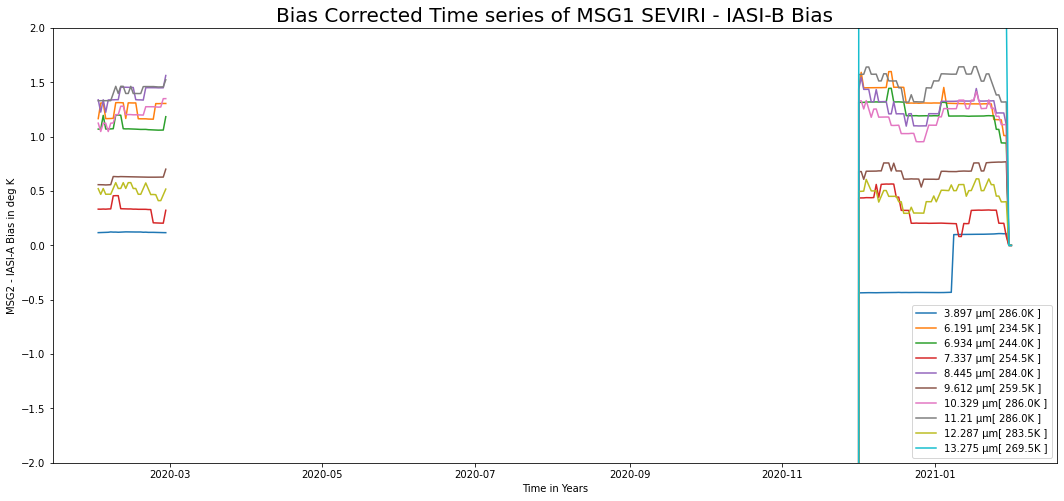

In [ ]:
print(bt_bias_array.shape)
plt.figure(figsize=(18,8))
plt.ylim(-2, 2)
plt.plot(new_index, np.transpose(bt_bias_array))

print(days_since1970, df_reindex.shape)
plt.title('Bias Corrected Time series of MSG1 SEVIRI - IASI-B Bias',fontsize=20)
plt.xlabel('Time in Years')
plt.ylabel('MSG2 - IASI-A Bias in deg K')
plt.legend(cfreq)